<a href="https://colab.research.google.com/github/Anchaliya75/NLP_Trigram/blob/main/mlp_trigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [39]:
words = open('data.txt','r').read().splitlines()


In [40]:
words[0:4]

['emma', 'olivia', 'ava', 'isabella']

In [41]:
len(words)

32033

In [42]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [43]:
n_gram   = 3
context  = ['.']*n_gram
n=0
for w  in words[:1]:
   temp =['.']*n_gram+list(w)+['.']
   for a ,b in zip(temp,temp[n_gram:]):
      print(''.join(temp[n:n+n_gram]),b)
      n+=1
     

... e
..e m
.em m
emm a
mma .


In [44]:
def create_dataset(words,n_gram):
  xs= []
  ys=[]
  n_gram   = n_gram
  for w  in words:
    temp =['.']*n_gram+list(w)+['.']
    for a  in temp[n_gram:]:
      train_word = list(temp[:n_gram])
      train_x_idx = [stoi[i] for i in train_word]
      train_y_idx = stoi[a]
      temp = temp[1:]
      xs.append(train_x_idx)
      ys.append(train_y_idx)
  xs= torch.tensor(xs)
  ys=torch.tensor(ys)
  return xs,ys
      

In [45]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.7*len(words))


Xtr, Ytr = create_dataset(words[:n1],3)
Xte, Yte = create_dataset(words[n1:],3)

In [46]:
#Data
g = torch.Generator().manual_seed(2147483647)
#One hot encoding of training Data
X_one_hot_train  = F.one_hot(Xtr,num_classes=27).float()
# X_one_hot_train =(samples,3,27)
# C  ->>>   (27,10)

# Converting this one hot vector of all data to a feature vector of 2 i.e embedding 27 features into 2 features
C = torch.rand((27,10),generator =g)
W1= torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p  in parameters:
   p.requires_grad= True


In [47]:
optimizer = optim.Adam(parameters,lr=0.01)
lossi= []
stepi=[]

In [48]:
# training Loss
for i in range(200):
  
  # h=  ((X_one_hot @ C).view(x.shape[0],-1))@ W1 +b1
  # X_one_hot  --->(32,3,27)
  # C ->>>>>>   [27,2]  Feature Vector
  embedding  =  (X_one_hot_train @ C).view(Xtr.shape[0],-1)
  hidden = embedding @ W1  +b1
  output = hidden @ W2 +b2
  loss  =  F.cross_entropy(output,Ytr)
  lossi.append(loss.item())
  stepi.append(i)
  
  #Backward Pass
  for p  in parameters:
    p.grad  = None
  loss .backward()
  # print(loss)
  #Updating
  optimizer.step()
  # for p  in parameters:
  #   if(i<100 ):
  #     lr = 0.01
  #   else:
  #     lr =0.0001
  #   p.data -= lr * p.grad



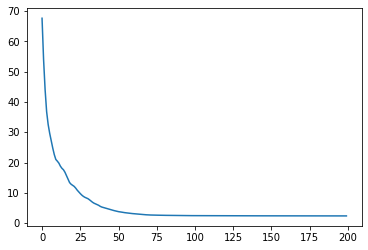

In [49]:
plt.plot(stepi,lossi)


In [50]:
# testing Loss
X_one_hot_test  = F.one_hot(Xte,num_classes=27).float()
embedding  =  (X_one_hot_test @ C).view(Xte.shape[0],-1)
hidden = embedding @ W1  +b1
output = hidden @ W2 +b2
loss  =  F.cross_entropy(output,Yte)
print(loss)

tensor(2.4513, grad_fn=<NllLossBackward0>)


In [51]:
for _ in range(20):
    
    out = []
    context = [0] * 3 # initialize with all ...
    while True:
      X_one_hot =  F.one_hot(torch.tensor(context),num_classes =27).float()
      emb  = X_one_hot @ C
      h = (emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits,dim =1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    print(''.join(itos[i] for i in out))

mirrssral.
ciaro.
sze.
guend.
fuile.
klid.
rmonei.
veel.
sazanialaha.
maa.
lhisiau.
rali.
lann.
san.
eli.
nolam.
rry.
wtztaaanin.
mea.
iatonamaii.
